## Linear Regression Foundations in Python

##### Importing the relevant packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

##### Generating a training dataset

In [3]:
#setting number of observations wanted from regression (easy modified)
num_obs = 50

#generating no. of random x inputs equal to num_obs with noise added.
x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

#set the y output with a rough linear relationship to the x variables.
y = 10 + 2*x1 + noise

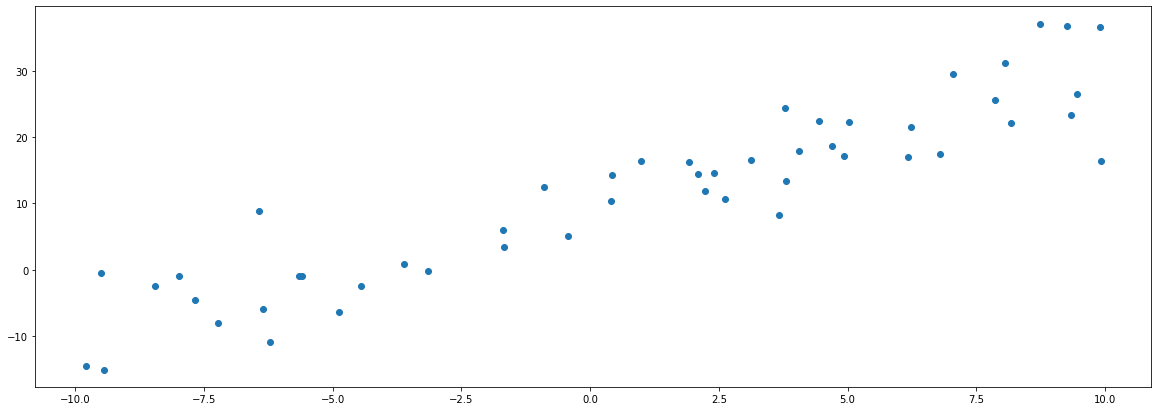

In [4]:
#Plotting the linear relationship between the two variables
plt.figure(figsize=(20,7))
plt.plot(x1, y, 'o')

#### Create and Fit Linear Regression Models

In [5]:
#creating dimensions for regression to fit into, x1 reshaped from numpy array to matrix & target y
features = x1.reshape(-1, 1)
target = y

#creating instance of the class LinearRegression
lr = LinearRegression()
#fit dimensions into regression variable
lr.fit(features, target)

LinearRegression()

#### Checking the results model

In [6]:
print(lr.intercept_)
print(lr.coef_)

9.62792955251054
[2.01045352]


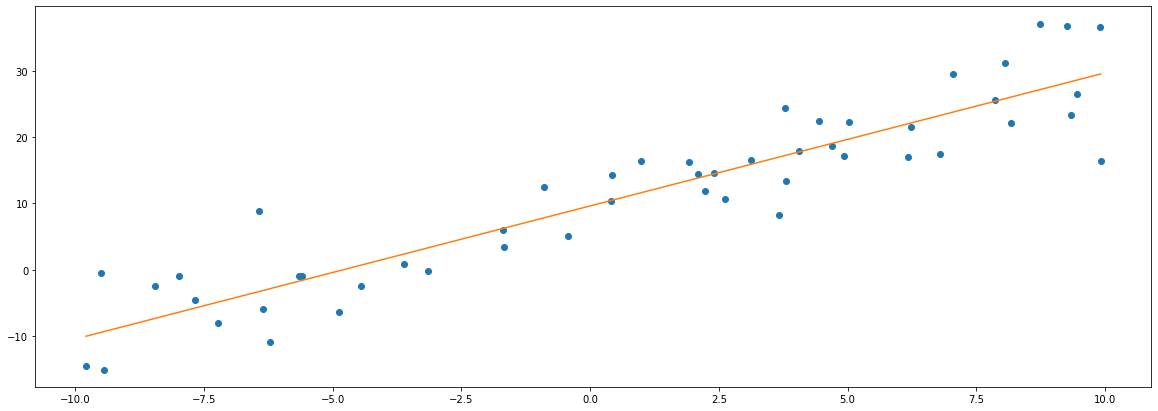

In [7]:
plt.figure(figsize=(20,7))
plt.plot(x1, y, 'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart)

#### Making Predictions

In [8]:
#create new array of x values
x_new = np.array([0, 1, 2, 3])

#manual calculation of y values
y_prediction = lr.intercept_ + x_new*lr.coef_[0]
y_prediction

array([ 9.62792955, 11.63838307, 13.64883658, 15.6592901 ])

In [9]:
# using the model to predict
lr.predict(x_new.reshape(-1,1))

array([ 9.62792955, 11.63838307, 13.64883658, 15.6592901 ])

#### Multiple Linear Regression 


In [10]:
#Used to estimate the relationship between two or more indepenent variables and one dependent variable
#state number of observations
num_obs = 50

#create multiple sets of x values
x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
x2 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
x3 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

#set y values with relationship to the x values
y = 10 + 2*x1 + 3*x2 - 5*x3 + noise

In [11]:
#Input the data values into a Pandas Dataframe
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

df.head()

,y,x1,x2,x3
0,-5.793790,-2.775663,8.371827,8.456119
1,21.776908,5.953979,7.245645,4.748120
2,33.824755,-5.401601,1.452009,-6.035584
3,50.606730,5.944534,6.481119,-1.500103
4,43.359425,7.096252,-2.759438,-3.635347


In [12]:
#fitting the multple linear regression
features = df[['x1','x2','x3']]
target = df['y']

lr = LinearRegression()
lr.fit(features,target)

print(lr.intercept_)
print(lr.coef_)

10.96723965721704
[ 2.08065885  2.99642323 -4.95220437]


#### Polynomial Regression

In [13]:
#Generating the set of x values, noise and y equation
num_obs = 50

x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

y = 10 + 2*x1 + x1**2 + noise

48.39461481039225
[2.71038749]


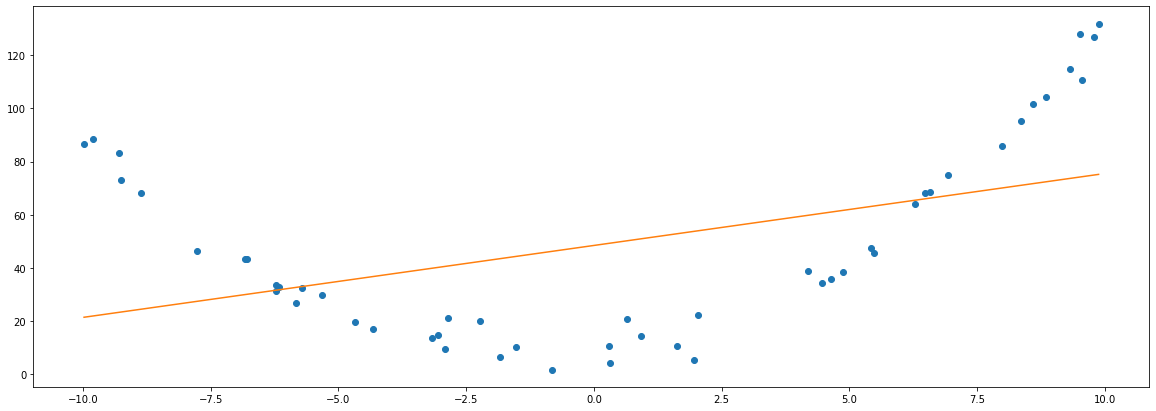

In [14]:
#Underfitting

features = x1.reshape(-1,1)
target = y

lr = LinearRegression()
lr.fit(features, target)

print(lr.intercept_)
print(lr.coef_)

plt.figure(figsize=(20,7))
plt.plot(x1,y,'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart)

In [15]:
#Using a linear regression on a polynomial equations does not work,thus the regression line won't accurrately predict new observations (Underfitting)

In [16]:
#Adding a x1^2 feature to fit the (quadratic) polynomial function
features = np.array(list(zip(x1, x1**2)))
features

array([[-1.84440367e+00,  3.40182491e+00],
       [ 8.35486076e+00,  6.98036983e+01],
       [-3.04756270e+00,  9.28763840e+00],
       [ 6.47149284e+00,  4.18802196e+01],
       [-2.91213265e+00,  8.48051657e+00],
       [-9.29905869e+00,  8.64724924e+01],
       [ 4.19762371e+00,  1.76200448e+01],
       [ 8.58927244e+00,  7.37756010e+01],
       [ 7.98366133e+00,  6.37388483e+01],
       [ 5.48494638e+00,  3.00846368e+01],
       [-1.52202024e+00,  2.31654561e+00],
       [ 9.87787166e+00,  9.75723486e+01],
       [ 9.51178737e+00,  9.04740989e+01],
       [-6.22722141e+00,  3.87782865e+01],
       [-9.81433152e+00,  9.63211031e+01],
       [-5.31943410e+00,  2.82963791e+01],
       [-7.76031331e+00,  6.02224627e+01],
       [ 4.47318716e+00,  2.00094033e+01],
       [ 6.58680609e+00,  4.33860144e+01],
       [ 9.78109310e+00,  9.56697822e+01],
       [-9.98038576e+00,  9.96081000e+01],
       [-4.67111606e+00,  2.18193252e+01],
       [-4.32551478e+00,  1.87100781e+01],
       [ 6.

8.830504828006738
[2.05184935 1.00731474]


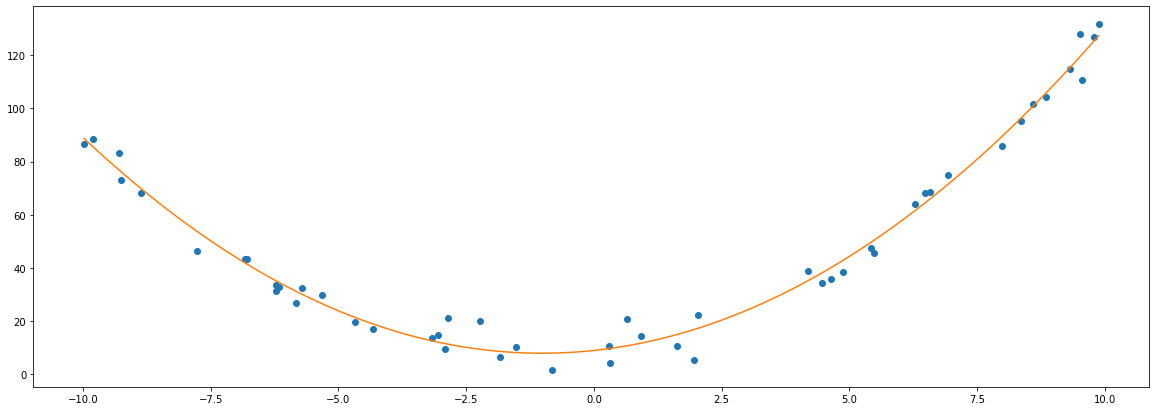

In [17]:
target = y

#Creating instance of the class LinearRegression and fitting it to the new features and target (y)
lr = LinearRegression()
lr.fit(features, target)

print(lr.intercept_)
print(lr.coef_)

#Plotting a more fitting regression line to equation using the new features fitted to the regression
plt.figure(figsize=(20,7))
plt.plot(x1, y, 'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart + lr.coef_[1]*x_chart**2)

In [18]:
#Polynomial equation with x^3 term added
num_obs = 50

x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

y = 10 + 2*x1 + x1**2 - 0.1*x1**3 + noise

In [19]:
#combining the three erms together in the features
features = np.array(list(zip(x1,x1**2,x1**3)))
features

array([[ 8.85674567e+00,  7.84419439e+01,  6.94740347e+02],
       [-3.26861457e+00,  1.06838412e+01, -3.49213590e+01],
       [ 6.78905547e+00,  4.60912742e+01,  3.12916218e+02],
       [-5.86758933e+00,  3.44286045e+01, -2.02012913e+02],
       [-6.22139903e+00,  3.87058059e+01, -2.40804264e+02],
       [ 1.27302092e+00,  1.62058226e+00,  2.06303512e+00],
       [ 9.32944572e+00,  8.70385574e+01,  8.12021496e+02],
       [-8.93594267e+00,  7.98510713e+01, -7.13544595e+02],
       [-4.66209733e+00,  2.17351515e+01, -1.01331392e+02],
       [-7.64665662e+00,  5.84713574e+01, -4.47110392e+02],
       [ 1.05121017e+00,  1.10504282e+00,  1.16163225e+00],
       [ 7.00241811e+00,  4.90338594e+01,  3.43355586e+02],
       [ 5.17940882e+00,  2.68262758e+01,  1.38944249e+02],
       [ 3.49357093e+00,  1.22050379e+01,  4.26391655e+01],
       [-9.88493403e+00,  9.77119207e+01, -9.65875890e+02],
       [ 8.61298268e+00,  7.41834707e+01,  6.38940949e+02],
       [ 6.51766838e+00,  4.24800011e+01

10.478338045048858
[ 1.74299218  1.00231763 -0.09403623]


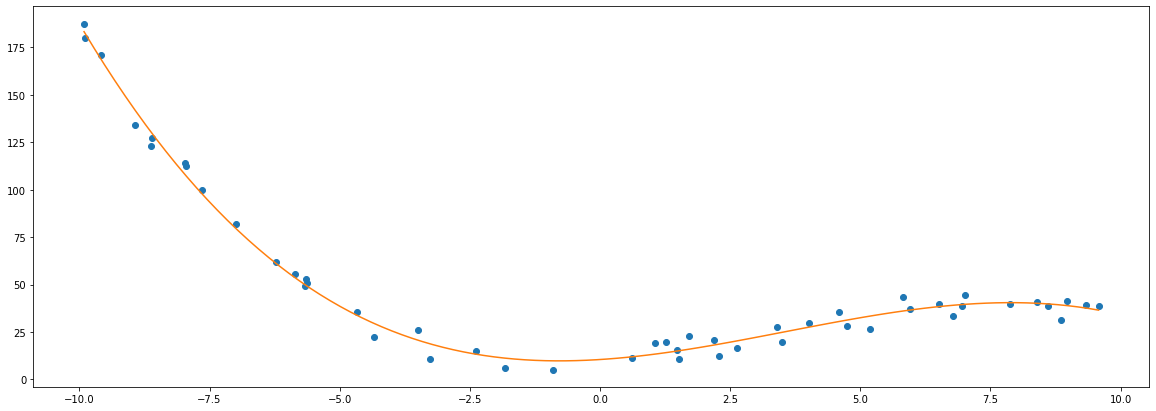

In [20]:
#fitting/plotting regression model to actual plots
target = y

lr = LinearRegression()
lr.fit(features, target)

print(lr.intercept_)
print(lr.coef_)

plt.figure(figsize=(20,7))
plt.plot(x1, y, 'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart + lr.coef_[1]*x_chart**2 + lr.coef_[2]*x_chart**3)

In [21]:
#Overfitting
#generated random sample size 10 with simple linear relationship between x1 and y
num_obs = 10

x1 = np.random.uniform(low=-10.0, high=10.0, size=num_obs)
noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)

y = 10 +2*x1 + noise

4.320223111903685
[-3.76332990e-01 -2.39965137e+00  4.46581440e-01  1.86956956e-01
 -1.66702584e-02 -4.10850073e-03  1.59258329e-04  2.82431158e-05]


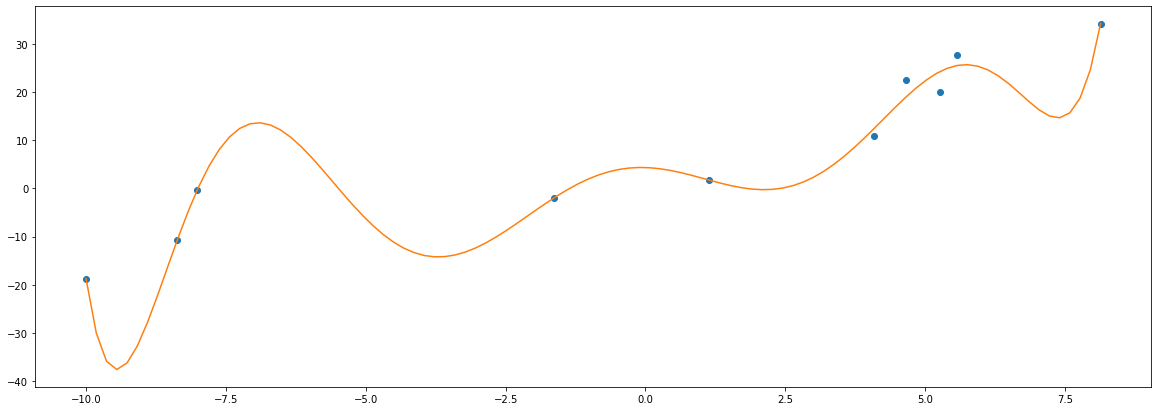

In [22]:
#Fitting two many terms to a simple relationship (overfitting)
features = np.array(list(zip(x1, x1**2, x1**3, x1**4, x1**5, x1**6, x1**7, x1**8)))
target = y

lr = LinearRegression()
lr.fit(features, target)

print(lr.intercept_)
print(lr.coef_)

plt.figure(figsize=(20,7))
plt.plot(x1, y, 'o')

x_chart = np.linspace(x1.min(), x1.max(), num=100)
plt.plot(x_chart, lr.intercept_ + lr.coef_[0]*x_chart +
                                  lr.coef_[1]*x_chart**2 +
                                  lr.coef_[2]*x_chart**3 +
                                  lr.coef_[3]*x_chart**4 +
                                  lr.coef_[4]*x_chart**5 +
                                  lr.coef_[5]*x_chart**6 +
                                  lr.coef_[6]*x_chart**7 +
                                  lr.coef_[7]*x_chart**8)

In [23]:
#model is too overfit for the dataset, the noise can not be accurately predicted with such little information.

#### Applied LR Using Datasets and Test/Train Splits

In [24]:
dataset = pd.read_csv('Downloads\Python\student_scores.csv')

In [25]:
dataset.shape

(25, 2)

In [26]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


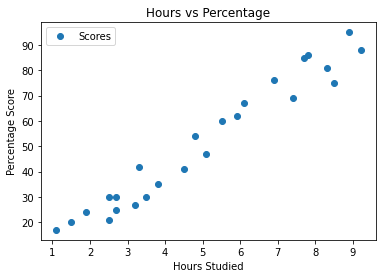

In [27]:
dataset.plot(x='Hours' , y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [28]:
#Data Prep
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

#-1 for X as that contains all columns except the last while Y is '1' for the scores (Dependent varible) column


In [29]:
#Splitting Datq (80% to training set while 20% goes to a test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0 )

In [30]:
#Training the algorithm and fitting to dataset

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
print(lr.intercept_)
print(lr.coef_)

2.018160041434683
[9.91065648]


In [32]:
#For every one unit change in hours studies, the score change is about 9.91%

In [33]:
#Making Predictions
y_pred = lr.predict(X_test)

In [34]:
#Creating dataframe comparing predicted values to the actual
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Multple Linear Regression Example

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
dataset = pd.read_csv('Downloads\Python\petrol_consumption.csv')

In [37]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [38]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [39]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [40]:
from sklearn.model_selection import train_test_split
#The dataset is split into data for training and data for testing (80/20 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
#Fitting our train data to the LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
#Showing the coefficients for each independent variable (How much they affect the dependent variable - Petrol Consumption)
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [43]:
#Calculating predicted y values from the model generated and comparing them to our test data for validity
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734
